In [15]:
# Importing necessory libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Churn_Modelling/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
## Divide the dataset into two parts. Independant and Dependant 
X = df.iloc[:, 3:-1]
y = df.iloc[:, 13]


In [4]:
# Feature Engineering 
geography = pd.get_dummies(X['Geography'],drop_first=True).astype(int)
gender = pd.get_dummies(X['Gender'],drop_first=True).astype(int)

# Concat new features 
X = X.drop(['Gender', 'Geography'], axis=1)
X = pd.concat([X, geography, gender], axis=1)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# do the train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
X_train.shape

(8000, 11)

In [17]:
# Let's create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout


In [21]:
# intialization of the ANN  
classifier = Sequential()

In [22]:
# True input layer
# classifier.add(Input(shape=(X_train.shape[1],))) # this is the input layer
# Adding the input layer
classifier.add(Dense(units=7, activation='relu')) # this is jus an hidden layer
# Adding the hidden layer
classifier.add(Dense(units=6, activation='relu'))
# Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))


In [23]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [28]:
# Early Stopping
import tensorflow.keras as keras
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [29]:
# Training the model 

model_history = classifier.fit(X_train, y_train, batch_size=10, epochs=1000, validation_split=0.33, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8550 - loss: 0.3326 - val_accuracy: 0.8523 - val_loss: 0.3576
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8561 - loss: 0.3370 - val_accuracy: 0.8531 - val_loss: 0.3576
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8644 - loss: 0.3338 - val_accuracy: 0.8527 - val_loss: 0.3579
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8545 - loss: 0.3439 - val_accuracy: 0.8512 - val_loss: 0.3613
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8602 - loss: 0.3331 - val_accuracy: 0.8508 - val_loss: 0.3579
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8624 - loss: 0.3308 - val_accuracy: 0.8523 - val_loss: 0.3578
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8672 - loss: 0.3201 - val_accuracy: 0.8519 - val_loss: 0.3569
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8575 - loss: 0.3409 - 

In [30]:
model_history.history.keys()   

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

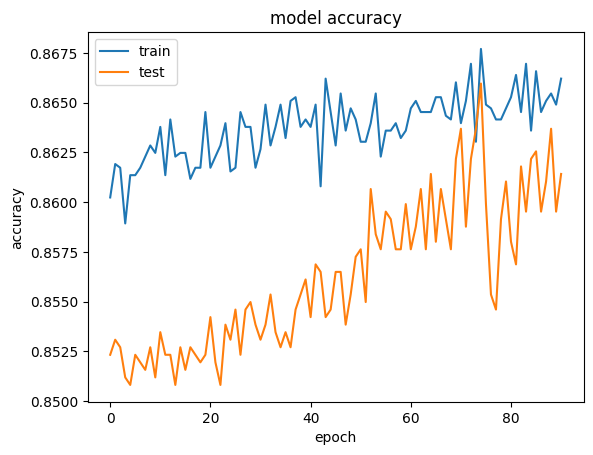

In [32]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

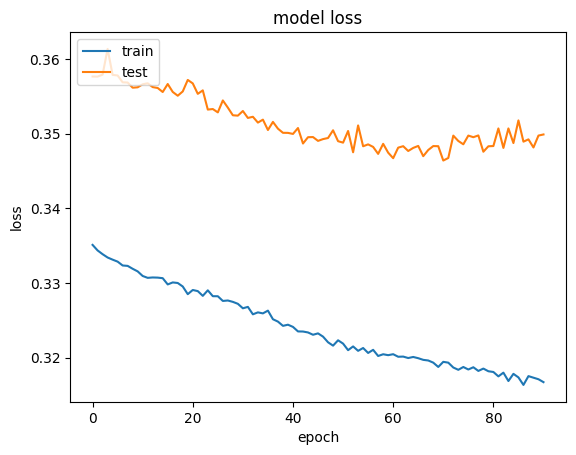

In [33]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step


0.8595

In [39]:
# get the weights
classifier.get_weights()
 

[array([[ 5.32176867e-02, -1.36305084e-02, -6.13862611e-02,
          5.27743176e-02, -1.08620271e-01, -1.60568394e-03,
          1.55260623e-01],
        [ 1.52494043e-01, -6.58713102e-01,  4.12527233e-01,
          7.67827451e-01,  1.00982726e+00,  8.85284424e-01,
          1.89826414e-01],
        [ 2.12709069e-01, -2.41861299e-01, -1.35806844e-01,
          2.48535909e-02, -1.18240155e-01,  2.05521032e-01,
          3.65661085e-01],
        [-1.34091079e-01, -1.11828521e-01,  1.60636938e+00,
          3.72637063e-01, -9.10736859e-01,  2.21938384e-03,
         -3.22921604e-01],
        [ 9.34812069e-01, -1.70103256e-02, -1.72922045e-01,
          1.36491764e+00, -8.82878482e-01,  6.48920894e-01,
          5.97458221e-02],
        [-4.94342297e-02, -1.00656658e-01, -8.03462267e-02,
          1.67332925e-02, -6.68877736e-02,  1.22945443e-01,
          8.32599774e-02],
        [-8.85684609e-01,  1.06930874e-01,  1.11425258e-01,
          2.89016515e-01,  1.55127766e-02,  1.17398667e+00

In [ ]:
classifier2 = Sequential()
# True input layer
# classifier.add(Input(shape=(X_train.shape[1],))) # this is the input layer
# Adding the input layer
classifier2.add(Dense(units=7, activation='relu')) # this is jus an hidden layer
# adding an dropout layer
classifier2.add(Dropout(0.2))
# Adding the hidden layer
classifier2.add(Dense(units=6, activation='relu'))
# Adding the output layer
classifier2.add(Dense(units=1, activation='sigmoid'))

classifier2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Training the model
